#**Bootcamp Alura - Data Science Aplicada**

**Projeto Módulo 2**

Visualização de dados com Seaborn e Matplotlib

Gustavo Hideki Nakamura


#**Cobertura vacinal contra o sarampo e o ressurgimento de surtos nos anos recentes**

Em 2016 o vírus do sarampo foi declarado erradicado do Brasil segundo a Organização Pan-Americana da Saúde. Apenas dois anos depois o Brasil registrou dois surtos na região Norte, nos estados de Roraima e Amazonas, além de casos confirmados em outros estados como São Paulo, Rio Grande do Sul, Rondônia, Pará e Rio de Janeiro. Durante o ano de 2018 foram confirmados 10.330
casos de sarampo no País distribuídos em 11 Undiades da Federação.
Em 2019 um surto de grandes proporções se inciciou no estado de São Paulo com pelo menos 16.090 casos confirmados em 259 municípios.


Como a única forma de prevenção é a vacina, a baixa cobertura vacinal é apontada como principal causa para a doença ter retornado ao país.

**O objetico desta análise é verificar a relação direta entre a queda da cobertura vacinal e a reintrodução do vírus do sarampo ao Brasil.**


**O Sarampo**
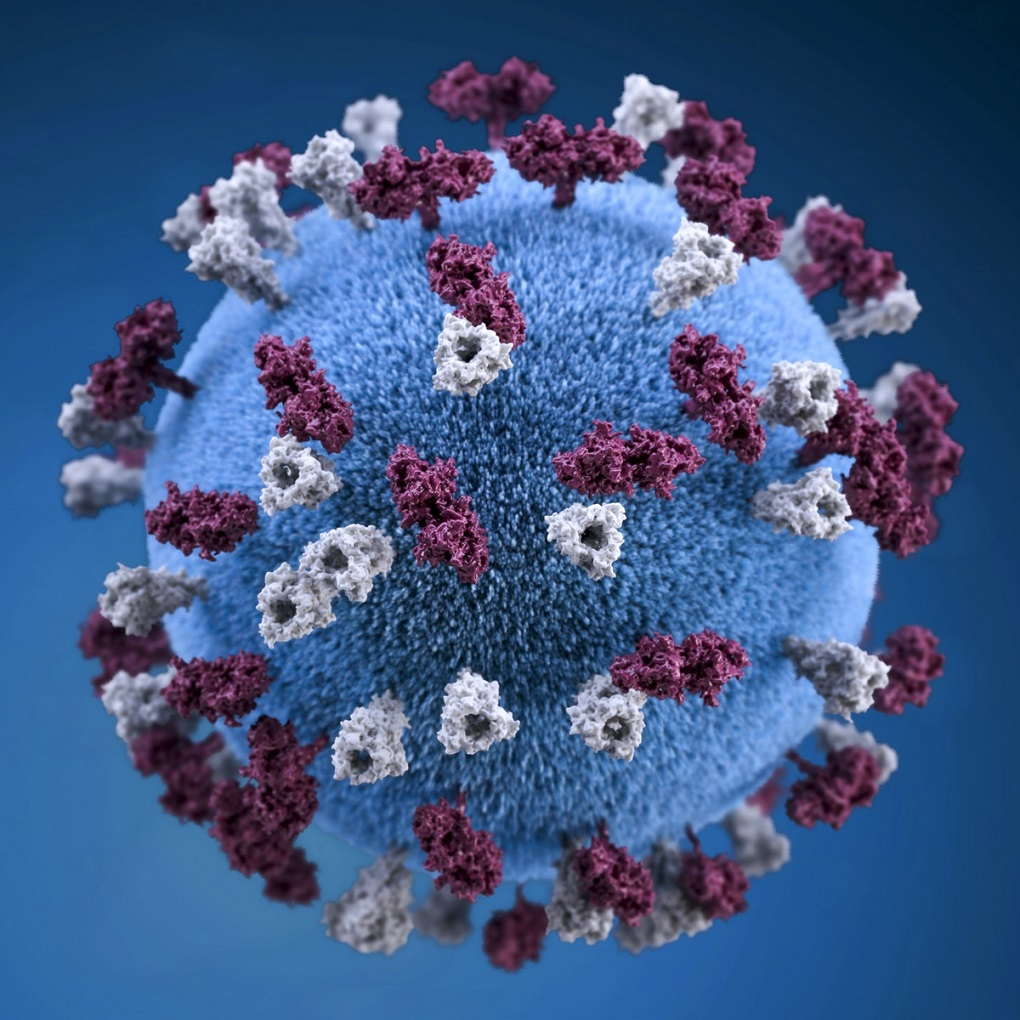

Uma representação gráfica 3D de uma partícula esférica do vírus do sarampo.

O sarampo é uma doença infectocontagiosa causada por um vírus do gênero Morbillivirus.É uma doença que se espalha por meio do ar e do contato direto, por meio das secreções expelidas quando um indivíduo contaminado fala, tosse ou espirra. 
Essa doença é grave e pode causar a morte. Em algumas partes do mundo, o sarampo é uma das principais causas de morte de crianças com idade inferior a cinco anos. Se não tratada rapidamente, pode provocar lesão cerebral, cegueira, surdez, retardo do crescimento e morte.

O sarampo apresenta como principais sintomas febre alta a moderada, conjuntivite, lacrimejamento, fotofobia, dor de cabeça, tosse e coriza. Além disso, surgem manchas vermelhas na pele, que inicialmente aparecem no rosto e atrás da orelha e posteriormente se espalham pelo corpo.

Atualmente não existe uma forma específica de tratar o sarampo. Geralmente o tratamento baseia-se em hidratar o paciente, garantir o suporte nutricional e reduzir a hipertermia (aumento da temperatura do corpo por causa da falha dos mecanismos de dissipação do calor). Para evitar complicações graves, como danos oculares e até mesmo cegueira, geralmente é administrada vitamina A em crianças acometidas pela doença.


**Prevenção**

O esquema vacinal vigente prevê duas doses de vacina contra o sarampo: uma dose da tríplice viral ou SCR (que protege contra sarampo, caxumba e rubéola) aos 12 meses de idade e uma dose da tetra viral ou SCRV (contra sarampo, caxumba, rubéola e varicela) aos 15 meses de idade.
Quem não completou este esquema vacinal quando era criança precisa atualizar a carteira de vacinação. Adolescentes e adultos, menores de 30 anos, precisam ter tomado durante a vida duas doses de tríplice viral ou SRC (ou uma da tríplice e outra da tetra viral). Já os adultos de 30 a 49 anos precisam ter tomado, ao menos, uma dose da tríplice viral após 1 ano de idade.
Quem já tomou duas doses da vacina em algum momento da vida é considerado imunizado e protegido do sarampo.

De acordo com o calendário de rotina do Ministério da Saúde, pessoas com 50 anos ou mais não precisam se vacinar, pois estas pessoas cresceram numa época em que sarampo era uma doença muito comum, tornando-as possivelmente imunizadas naturalmente.

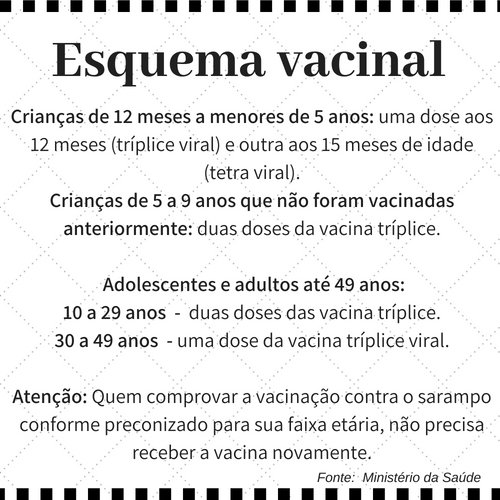

**Eficácia da vacina contra o sarampo**

A dose única tem eficácia de 90 a 95% na proteção contra a doença, enquanto a dupla fica entre 95 e 98%. Tomar as duas doses minimiza o risco de falha vacinal – quando o organismo não produz anticorpos contra a enfermidade mesmo após a vacinação. 

Para que um indivíduo esteja relativamente protegido mesmo em caso de falha vacinal – incluindo as crianças pequenas, que têm maior risco de complicações pelo sarampo – **é preciso que a cobertura vacinal da população esteja sempre acima de 95%**. Nessa situação a circulação do vírus é praticamente interrompida.

#**Análise da cobertura vacinal**

A análise se focará na cobertura vacinal da primeira dose da Tríplice Viral que entrou para o calendário oficial de vacinação infantil em 2003.


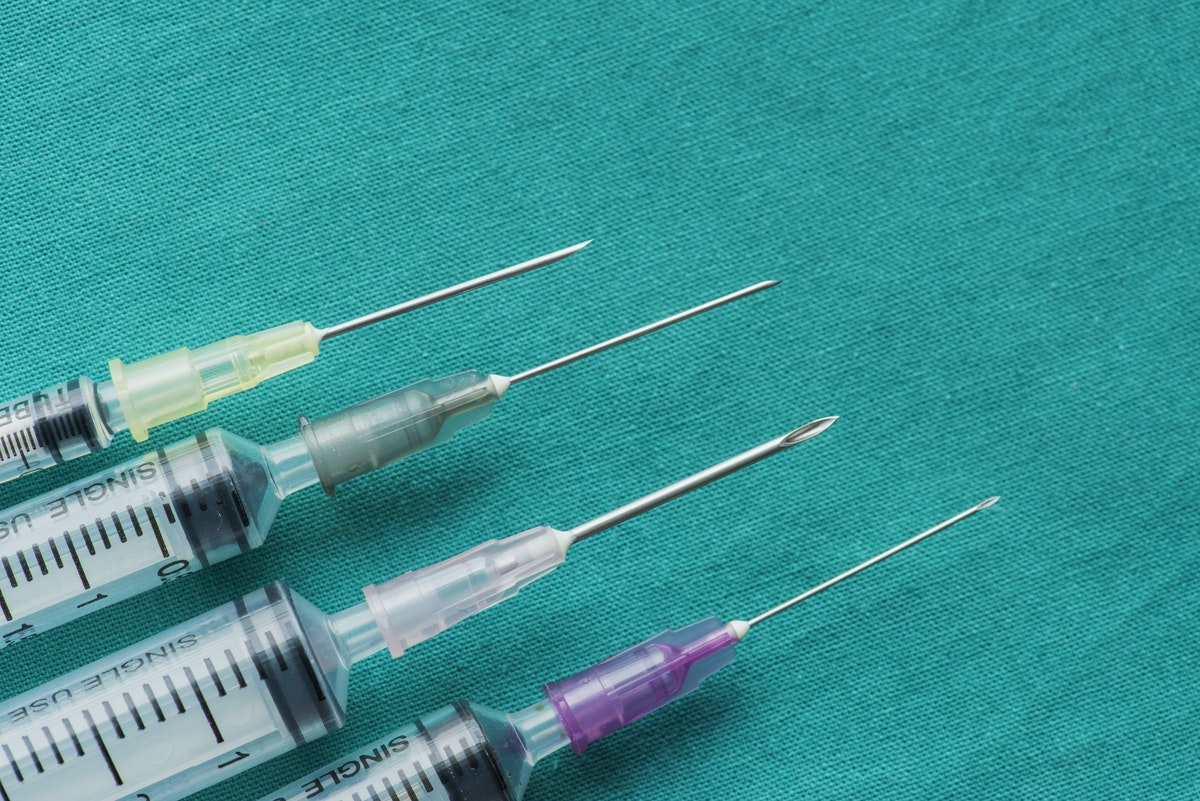

#Origem dos dados
Os dados foram obtidos do sistema de Informações de Saúde [(TABNET) do DATASUS](http://www2.datasus.gov.br/DATASUS/index.php?area=02).

#Importando os dados



In [100]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from datetime import date 

#Internacoes 1998-2007
dados_1998_2007 = pd.read_csv("https://raw.githubusercontent.com/gustavohn578/Bootcamp_Data_Science/main/Dados/A223537189_28_143_208_Processamento_Sarrampo_1998-2007.csv", 
                              encoding="ISO-8859-1", skiprows=4, sep=";", skipfooter=1, thousands=".", decimal=",", engine='python')

#Internacoes 2008-2021
dados_2008_2021 = pd.read_csv("https://raw.githubusercontent.com/gustavohn578/Bootcamp_Data_Science/main/Dados/A223537189_28_143_208_Processamento_Sarrampo_2008-2021.csv", 
                              encoding="ISO-8859-1", skiprows=4, sep=";", skipfooter=6, thousands=".", decimal=",", engine='python')

#Cobertura Vacinal
cobertura_vacinal = pd.read_csv("https://raw.githubusercontent.com/gustavohn578/Bootcamp_Data_Science/main/Dados/A200912189_28_143_208_TripliceViralD1.csv", 
                                encoding="ISO-8859-1", skiprows=4, sep=";", skipfooter=19, thousands=".", decimal=",", engine='python')

#Internacoes por faixa etária SP
internacoes_SP = pd.read_csv("https://raw.githubusercontent.com/gustavohn578/Bootcamp_Data_Science/main/Dados/A230222189_28_143_208_AnoAtendimento_SP_Faixa1.csv", 
                                encoding="ISO-8859-1", skiprows=5, sep=",", skipfooter=6, thousands=".", decimal=",", engine='python') 

#Internações por faixa etária AM
internacoes_AM = pd.read_csv("https://raw.githubusercontent.com/gustavohn578/Bootcamp_Data_Science/main/Dados/A231350189_28_143_208_AnoAtendimento_AM_Faixa1.csv", 
                                encoding="ISO-8859-1", skiprows=5, sep=",", skipfooter=6, thousands=".", decimal=",", engine='python')                               

#Tratando os dados

**Funções para tratamento dos dados:**

In [101]:
#FUNÇÕES

###################################################################################################################################
# trata_dados(df_csv)
# Funcao para tratar os dados do DataSUS - internações e cobertura vacinal
# Parametro df_csv: DataFrame
###################################################################################################################################
def trata_dados(df_csv):
  #tratamento dos dados dos gastos
  df_csv = df_csv.rename(columns = {'Unidade da Federação': 'UF'}, inplace = False)
  df_csv = df_csv.set_index("UF")

  #elimina coluna e linha "Total"
  #if df_csv.index.str.contains('Total').any():
  #  df_csv = df_csv.drop(["Total"],axis=0)
  if df_csv.columns.str.contains('Total').any():
    df_csv = df_csv.drop(["Total"],axis=1)

  #substitui "-" pelo valor 0
  df_csv = df_csv.replace(to_replace='-', value=0)

  #substitui "NaN" pelo valor 0
  df_csv = df_csv.fillna(0)
  
  for col in df_csv.columns:
    df_csv[col] = df_csv[col].astype(int)

  df_csv.columns = df_csv.columns.map(para_int) 

  #elimina codigo numerico
  df_csv.index = df_csv.index.str[3:]
  df_csv = df_csv.rename(index = {'al': 'Total'}, inplace = False)
  return df_csv

###################################################################################################################################
# trata_dados_faixa(df_csv)
# Funcao para tratar os dados do DataSUS relativos as internacoes distribuidas por faixa etaria
# Parametro df_csv: DataFrame
###################################################################################################################################
def trata_dados_faixa(df_csv):
  df_csv = df_csv.rename(columns = {'Faixa Etária 1': 'Faixa'}, inplace = False)
  df_csv = df_csv.set_index("Faixa")

  #elimina coluna "Total"
  if df_csv.columns.str.contains('Total').any():
    df_csv = df_csv.drop(["Total"],axis=1)

  #substitui "-" pelo valor 0
  df_csv = df_csv.replace(to_replace='-', value=0)

  #substitui "NaN" pelo valor 0
  df_csv = df_csv.fillna(0)
  
  for col in df_csv.columns:
    df_csv[col] = df_csv[col].astype(int)

  df_csv.columns = df_csv.columns.map(para_int) 

  return df_csv

###################################################################################################################################
# para_int(ano)
# Funcao para converter para inteiro
# Parametro ano: ano no formato string
###################################################################################################################################
def para_int(ano):
    year: int = int(ano)
    return year


**Intervalo de análise**

O intervalo de análise corresponde ao período disponíviel para a cobertura vacinal da Tríplice Viral, de 2000 a 2019:


In [102]:
display(cobertura_vacinal.head())

,Unidade da Federação,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,NaN,17.15,93.85,94.94,115.24,130.63,115.99,125.36,116.70,103.49,102.29,100.41,102.72,105.40,106.52,146.88,109.00,109.79,105.52,102.03,56.62,102.28
1,12 Acre,NaN,27.55,67.82,104.56,99.40,123.22,95.12,90.84,109.45,94.17,103.45,96.87,105.29,90.28,95.00,99.20,84.21,75.71,79.76,82.94,52.58,89.16
2,13 Amazonas,NaN,14.84,27.69,71.27,91.30,86.06,104.03,103.37,110.07,101.56,103.13,100.11,94.67,103.39,98.77,114.36,95.42,83.56,84.59,90.09,58.89,86.94
3,14 Roraima,NaN,25.35,61.93,75.26,110.22,110.32,116.01,94.23,97.31,95.51,100.61,94.49,97.98,87.83,89.07,110.16,108.45,90.77,89.13,105.04,48.20,90.17
4,15 Pará,NaN,10.14,47.94,120.34,124.98,143.10,116.35,113.05,118.49,111.83,117.62,110.95,109.25,102.20,98.49,115.73,71.92,69.61,70.90,76.15,44.86,94.87


**Rotina para tratamento dos dados**

In [103]:
#Retira o ano de 1999
cobertura_vacinal = cobertura_vacinal.drop('1999',axis=1)

#Tratamento dos dados
cobertura_vacinal = trata_dados(cobertura_vacinal)
dados_1998_2007 = trata_dados(dados_1998_2007)
dados_2008_2021 = trata_dados(dados_2008_2021)

#intervalo de interesse: a partir de 2000
anos_interesse = dados_1998_2007.columns[2:] 
dados_1998_2007 = dados_1998_2007[anos_interesse]

#intervalo de interesse: ate 2019
anos_interesse = dados_2008_2021.columns[:-2]
dados_2008_2021 = dados_2008_2021[anos_interesse]

#união dos dois intervalos
dados_2000_2019 = dados_1998_2007.join(dados_2008_2021)
dados_2000_2019 = dados_2000_2019.fillna(0)

#dados dos surtos de Amazona e São Paulo
internacoes_SP = trata_dados_faixa(internacoes_SP)
internacoes_AM = trata_dados_faixa(internacoes_AM)


#Análise dos surtos

Análise das internações por Sarampo no **SUS - Sistema Único de Saúde**. 



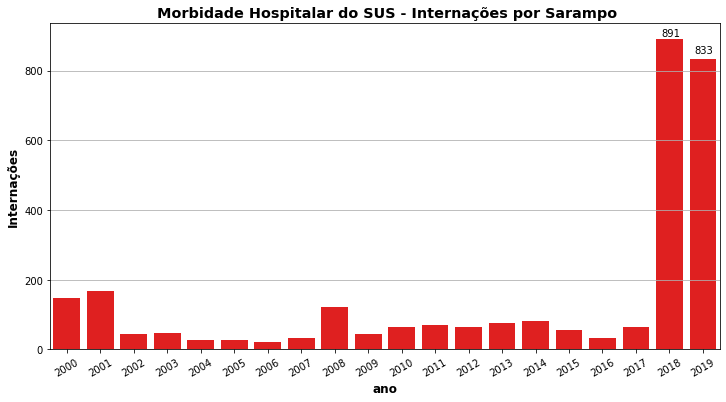

In [104]:
#plot - internações de 2000 a 2019
plt.figure(figsize=(12,6))
ax = sns.barplot(color="red", data=dados_2000_2019.T, x=dados_2000_2019.T.index, y="Total")
#anotação - internações em 2018
ax.annotate('891', xy=(18,891 ), xytext=(17.75,900))
#anotação - internações em 2018
ax.annotate('833', xy=(19,833 ), xytext=(18.75,850))
#grid no eixo y
ax.grid(axis='y', which='major', linestyle='-')

#labels e titulo
plt.xticks(rotation=30)
plt.title(' Morbidade Hospitalar do SUS - Internações por Sarampo', weight='bold', fontsize='x-large')
plt.xlabel("ano",weight='bold',fontsize='large')
plt.ylabel("Internações",weight='bold',fontsize='large')
plt.show()

O aumento do número de internações em 2018 e 2019 evidenciam a reintrodução do vírus do Sarampo no Brasil.
Em 2018 os surtos se concentraram na região Norte, provavelmente indroduzidos a partir de casos importados da Venezuela. Na ocasião o genótipo identificado foi o mesmo que estava em circulação na Venezuela.

Nos primeiros meses de 2019, a transmissão do vírus sarampo foi interrompida na região Norte do País. No entanto, a partir do mês de fevereiro de 2019, casos importados de Israel e Noruega iniciaram novas cadeias de transmissão no País. 
Os primeiros casos notificados e confirmados de sarampo ocorreram no estado de São Paulo, com a notificação de casos em tripulantes de um navio de Cruzeiro MSC SEAVIEW de bandeira Malta, atracado no porto da cidade de Santos/São Paulo com 5.420 passageiros e aproximadamente 1.500 tripulantes.

No mês de abril de 2019 iniciou-se um surto de grandes proporções na região metropolitana de São Paulo.

#Surtos regionais - Internações no Amazonas (2018) e em São Paulo (2019)

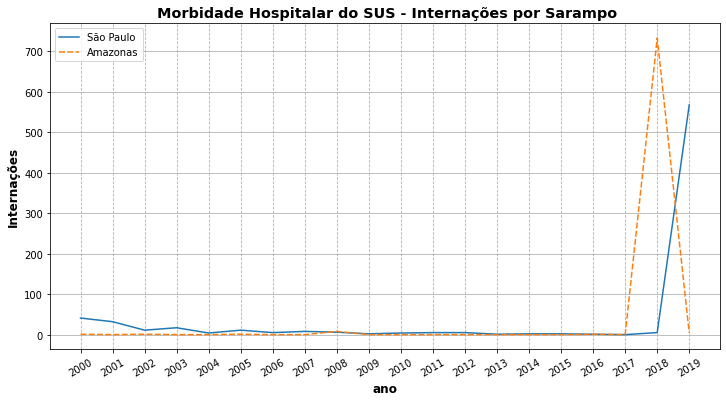

In [105]:
#plot - internações de 2000 a 2019 - Amazonas e São Paulo
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=dados_2000_2019.T[['São Paulo','Amazonas']])

#grids, ticks e legenda
ax.grid(axis='y', which='major', linestyle='-')
ax.grid(axis='x', which='major', linestyle='--')
ax.legend(loc="upper left")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

#labels e titulo
plt.xticks(rotation=30)
plt.title(' Morbidade Hospitalar do SUS - Internações por Sarampo', weight='bold', fontsize='x-large')
plt.xlabel("ano",weight='bold',fontsize='large')
plt.ylabel("Internações",weight='bold',fontsize='large')
plt.show()

Com histórico de poucas o nenhuma internação ao longo dos anos, os picos nos estados do Amazonas e São Paulo mostram que estes foram os epicentros dos surtos nos anos de 2018 e 2019 respectivamente.

O estado do Amazonas registrou 9695 casos confirmados até 26/11/2018, 95,4% do total.

Em 2019 São Paulo registrou 16090 casos, 88,4% do total.

#Cobertura Vacinal

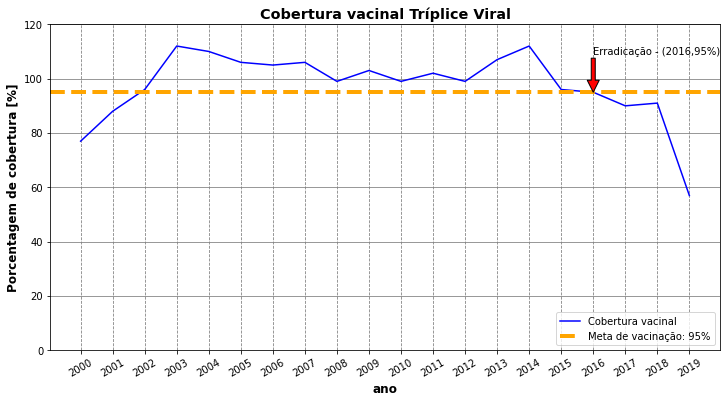

In [106]:
import matplotlib.ticker as ticker

#plot - cobertura vacinal nacional
plt.figure(figsize=(12,6))
ax = sns.lineplot(color="b", data=cobertura_vacinal.T, x=cobertura_vacinal.columns, y="Total",label='Cobertura vacinal')

#linha da meta
ax.axhline(y=95, color='orange', linewidth=4, ls='--', label='Meta de vacinação: 95%')

#ticks, limites do eixo y, grid, legenda
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim([0, 120])
ax.grid(b=True, axis='y', which='major', color='grey', linestyle='-')
ax.grid(b=True, axis='x', which='major', color='grey', linestyle='--')
ax.legend(loc="lower right")

#anotação, título e labels dos eixos
plt.annotate(s='Erradicação - (2016,95%)', xy=[2016, 95], xytext=[2016,109], arrowprops=dict(facecolor='r'))
plt.title('Cobertura vacinal Tríplice Viral', weight='bold', fontsize='x-large')
plt.xlabel("ano",weight='bold',fontsize='large')
plt.ylabel("Porcentagem de cobertura [%]",weight='bold',fontsize='large')
plt.xticks(rotation=30)
#plt.annotate('Entrada da Tríplice Viral no calendário infantil(2003)', xy=[3, 95], xytext=[3,81], arrowprops=dict(facecolor='green'))
plt.show()


No ano de 2016 a cobertura vacinal caiu para o patamar mínimo de 95%, sendo que por 15 anos consecutivos a cobertura vacinal da Tríplice Viral estava  dentro do patamar desejado, contribuindo para a erradicação do sarampo, reconhecida no mesmo ano de 2016.

É importante ressaltar que já em 2016 alguns estados não alcançarama cobertura vacinal de 95%, conforme veremos a seguir.

Em 2017 e 2018 a cobertura total caiu para algo em torno de 91% abrindo caminho para os surtos registrados.
De acordo com o [Ministério da Saúde o Brasil atingiu  99,4% de cobertura vacinal de sarampo em 2019.](https://www.gov.br/pt-br/noticias/saude-e-vigilancia-sanitaria/2019/12/brasil-atinge-99-4-de-cobertura-vacinal-de-sarampo-em-2019)
Por esse motivo a taxa indicada pelos dados do Datasus para o ano de 2019, o último da série, não será considerada, devido a esta discrepância que pode estar relacionada a dados incompletos e desatualizados.

#Cobertura vacinal dos estados

Análise da cobertura vacinal do Estado do Amazonas e do Estado de São Paulo.

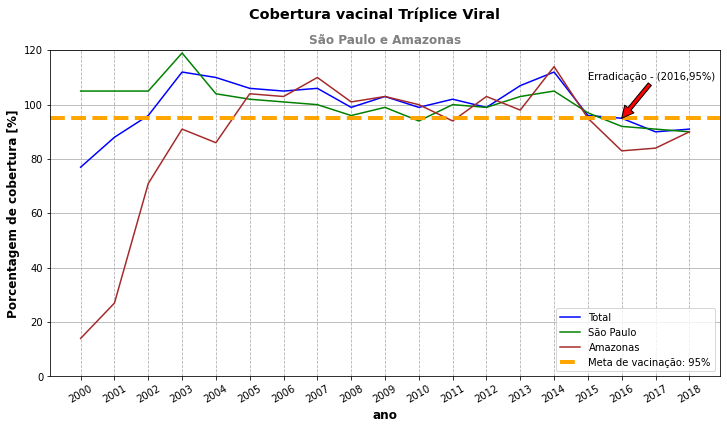

In [107]:
#plot - cobertura vacinal dos estados de São Paulo e Amazonas
ax1 = cobertura_vacinal.T[['Total','São Paulo','Amazonas']][:-1].plot(figsize=(12,6), label='Cobertura vacinal', color=('b','g','brown'))

#linha da meta
ax1.axhline(y=95, color='orange', linewidth=4, ls='--', label='Meta de vacinação: 95%')

#ticks, limites do eixo y, grid, legenda
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_ylim([0, 120])
ax1.grid(axis='y', which='major', linestyle='-')
ax1.grid(axis='x', which='major', linestyle='--')
ax1.legend(loc="lower right")

#anotação, título e labels dos eixos
plt.annotate(s='Erradicação - (2016,95%)', xy=[2016, 95], xytext=[2015,109], arrowprops=dict(facecolor='r'))
plt.suptitle('Cobertura vacinal Tríplice Viral', weight='bold', fontsize='x-large')
plt.title('São Paulo e Amazonas', weight='bold', fontsize='large', color='grey')
plt.xlabel("ano",weight='bold',fontsize='large')
plt.ylabel("Porcentagem de cobertura [%]",weight='bold',fontsize='large')
plt.xticks(rotation=30)
plt.show()

Conforme o gráfico indica, tanto São Paulo como Amazonas apresentaram desde 2016 coberturas vacinais abaixo de 95%, e abaixo da média nacional, o que justifica em parte os surtos de 2018 e 2019.

#Análise da faixa etária das internações

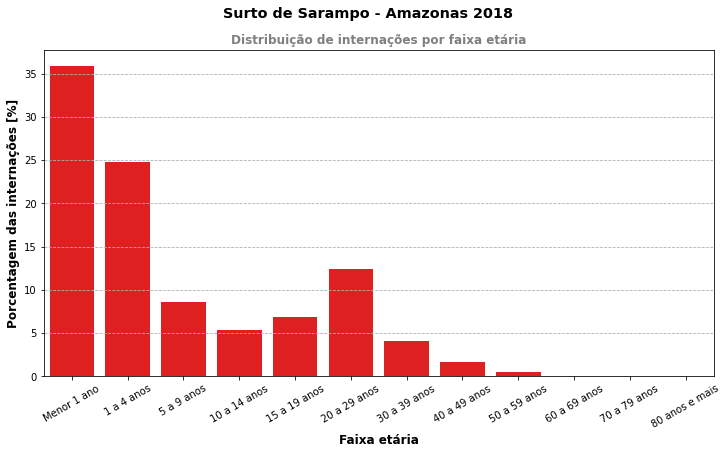

In [108]:
#Cálculo das porcentagens dos casos por faixa etária
internacoes_AM['2018_perc'] = (internacoes_AM[2018]/internacoes_AM.at['Total',2018])*100
internacoes_SP['2019_perc'] = (internacoes_SP[2019]/internacoes_SP.at['Total',2019])*100

#plot - distribuição percentual das internações por sarampo por faixa etária
plt.figure(figsize=(12,6))
ax = sns.barplot(color="red", data=internacoes_AM.drop('Total',axis=0), x=internacoes_AM.index.drop('Total'), y='2018_perc')

ax.grid(axis='y', which='major', linestyle='--')

#títulos e labels dos eixos
plt.suptitle('Surto de Sarampo - Amazonas 2018', weight='bold', fontsize='x-large')
plt.title('Distribuição de internações por faixa etária', weight='bold', fontsize='large', color='grey')
plt.xlabel("Faixa etária",weight='bold',fontsize='large')
plt.ylabel("Porcentagem das internações [%]",weight='bold',fontsize='large')
plt.xticks(rotation=30)
plt.show()


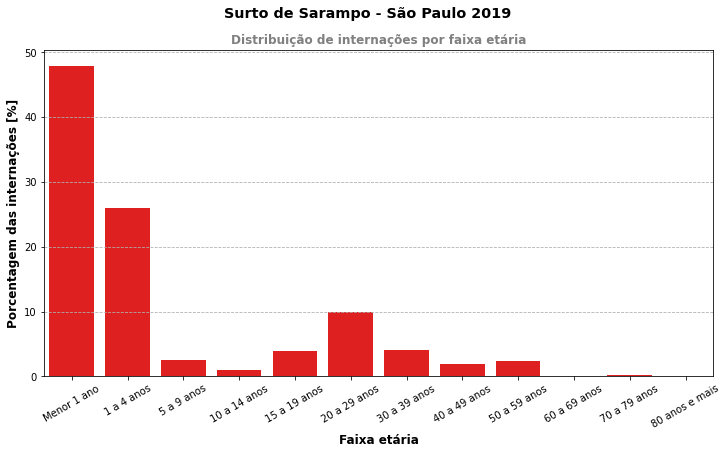

In [109]:
#plot - distribuição percentual das internações por sarampo por faixa etária
plt.figure(figsize=(12,6))
ax = sns.barplot(color="red", data=internacoes_SP.drop('Total',axis=0), x=internacoes_SP.index.drop('Total'), y='2019_perc')

ax.grid(axis='y', which='major', linestyle='--')

#títulos e labels dos eixos
plt.suptitle('Surto de Sarampo - São Paulo 2019', weight='bold', fontsize='x-large')
plt.title('Distribuição de internações por faixa etária', weight='bold', fontsize='large', color='gray')
plt.xlabel("Faixa etária",weight='bold',fontsize='large')
plt.ylabel("Porcentagem das internações [%]",weight='bold',fontsize='large')
plt.xticks(rotation=30)
plt.show()

Comforme esperado a faixa etária mais atingida é a de crianças com até 5 anos de idade.
Observa-se também uma maior proporção de casos na faixa de adultos entre 20 e 29 anos em ambos os estados.

As estimativas de proporção da população suscetível identificaram elevado número de suscetíveis, especialmente na população de 20 a 29 anos.

Segundo o [Boletim Epidemiológico 06](https://www.prefeitura.sp.gov.br/cidade/secretarias/upload/saude/Boletim_epidemiologico_SVS_06.pdf) da Secretatia de Vigilância em Saúde do Ministério da Saúde, a faixa etária de maiores de 30 anos demonstra elevado grau de imunidade prévia,
principalmente secundário à massiva campanha de vacinação para eliminação da rubéola congênita realizada em 2008. Nesta campanha foram vacinadas um total de 67,1 milhões de pessoas em todo o país, correspondendo a uma cobertura de 95,79%. A população alvo dessa campanha foram pessoas de 20 a 39 anos de idade, justamente o público que atualmente teria entre 31 a 50 anos.


#**Conclusões finais**

A queda na taxa de cobertura vacinal está ligada ao próprio sucesso do programa de vacinação, pois a ausência de epidemias diminuiu a percepção do risco para o sarampo.

Outros fatores que contribuem para reduzir a cobertura da vacinação são notícias falsas que vinculam [vacinas a autismo](https://www.gov.br/saude/pt-br/assuntos/noticias/especialistas-falam-sobre-o-impacto-das-noticias-falsas-nas-coberturas-vacinais-do-pais) e a falta de campanhas de conscientização.

A única forma de manter o sarampo sob controle é garantir que mais de 95% da população esteja imunizada. 

**Covid-19**

Os esforços necessários para controlar o Covid-19 resultaram em interrupções na vacinação e paralisaram os esforços para prevenir e minimizar os surtos de sarampo. Em novembro, mais de 94 milhões de pessoas corriam o risco de perder vacinas devido à suspensão das campanhas contra o sarampo em 26 países.

#Referências

* [Boletim Epidemiológico 06 da Secretatia de Vigilância em Saúde do Ministério da Saúde](https://www.prefeitura.sp.gov.br/cidade/secretarias/upload/saude/Boletim_epidemiologico_SVS_06.pdf)
* [Informe nº 32 - 26 DE NOVEMBRO DE 2018, Situação do Sarampo no Brasil – 2018](https://portalarquivos2.saude.gov.br/images/pdf/2018/novembro/28/Informe-Sarampo-n32.pdf)
* https://www.gov.br/saude/pt-br/assuntos/noticias/especialistas-falam-sobre-o-impacto-das-noticias-falsas-nas-coberturas-vacinais-do-pais
* https://www.gov.br/pt-br/noticias/saude-e-vigilancia-sanitaria/2019/12/brasil-atinge-99-4-de-cobertura-vacinal-de-sarampo-em-2019
* https://portal.fiocruz.br/noticia/infeccao-por-sarampo-aumentou-em-2019
* https://vestibular.brasilescola.uol.com.br/atualidades/surto-sarampo-no-brasil.htm#
* https://www.dw.com/pt-br/por-que-o-brasil-e-a-europa-est%C3%A3o-registrando-surtos-de-sarampo/a-50128255
* https://saude.curitiba.pr.gov.br/noticias/1169-tire-todas-as-duvidas-sobre-a-vacinacao-contra-o-sarampo.html


